# import

In [1]:
import numpy as np
import pandas as pd
import mdptoolbox
import time as time
import itertools
import csv
from decimal import *
import pdb

# Execute main functions

In [2]:
#read main functions 

#Transition Probability Matrix
#laptop : C:\Users\moham\OneDrive - Auburn University\Auburn University\RA\GMS\Reports\Main Codes
#office : "E:\one-Drive
transProb=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Transition Probability Matrix.py",encoding="utf8")
read_transProb=transProb.read()
exec(read_transProb)

#Rewards
Rewards=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Rewards.py",encoding="utf8")
read_Rewards= Rewards.read()
exec(read_Rewards)

#Find Optimal Policies
FOP=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Find Optimal Policies.py",encoding="utf8")
read_FOP= FOP.read()
exec(read_FOP)

#Make a dictionary of all combinations and strategies
MDCS=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Make a dictionary of all combinations and strategies.py",encoding="utf8")
read_MDCS= MDCS.read()
exec(read_MDCS)

# DoE

In [3]:
#rabge alphaG, betaG

In [4]:
#alphaG , changing data type to longdouble , by float it does work but only for making sure us long double
range_alpha=np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,0.09, 0.1 ,
                      0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99],dtype=np.longdouble)
#alphaG is key1

In [5]:
#betaG  ,changing data type to longdouble , by float it does work but only for making sure us long double
range_beta=np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,0.09, 0.1 ,
                      0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99],dtype=np.longdouble)
#betaG is key2

In [6]:
def doe_bothG(keys1, keys2,z1,z2):
    
    #keys1=list(np.arange(starta,stopa,step)) # for making range for alphaG
    #keys2=list(np.arange(startb,stopb,step))   #for making range for betaG

    
    #make a dictionary
    value=[]
    #keysA=[round(num, 2) for num in keys1] #how many decimal number is important
    #keysB=[round(num, 2) for num in keys2]
    keysA=keys1
    keysB=keys2
  
    #make a list which contains combination of alphas and betas
    comb_A_B=list(itertools.product(keysA,keysB))
    keep_numbers_A_B=dict.fromkeys(comb_A_B,value)  #keep numbers for all cobnations of alpha1G and beta1G
    General_keys1= keep_numbers_A_B.keys()
    General_keys=list(General_keys1)
    #for loop
    for k in General_keys:
        alpha1G=k[0]
        beta1G=k[1]
        
        #Transition Probability MAtrix
        P=newTransProb(z1, z2, alpha1G=alpha1G,beta1G=beta1G )    #do not forget to put lpha1G=alpha1G,beta1G=beta1G in func
       
        transitions=P.reshape(5,19,19)   #reshape the transtion probability matrix to (A,S,S)

        R=rewards()   #rewards
        reward=R.reshape(19,5)
        # Total cost use policy iteration method
        pi=mdptoolbox.mdp.PolicyIteration(transitions, reward, discount=0.9999, policy0=None, max_iter=10000, eval_type=0)
        #pi=mdptoolbox.mdp.ValueIteration(transitions, reward, discount, max_iter=10000)
        #run the  Policy iteration
        pi.run() 

        total_cost=pi.V
        rounded_total_cost=round(total_cost[0],2)
        #put all optimal Policies for Policy Iteration
        policy=pi.policy
        result=[]
        
        #values
        #result.append(rounded_total_cost)
        result.append(policy)
        #put all total costs and policies as values in dictionary
        keep_numbers_A_B[k]=result     #do not use append and extend here


    return keep_numbers_A_B

In [7]:
dbg=doe_bothG(range_alpha,range_beta,z1=0.9,z2=0.1)                                         

# Finding Uniqe Optimal Policy

In [65]:
#it calls the function from Main Functions script
fuop=dbg  #fuop is a constant name for a variable which gets the experiments
opt_dict1=find_optimal_policies(fuop)   #the input is Fuop output is opt_dict
opt_dict1

{'No-No': [],
 'No-Gel': [],
 'Gel-No': [],
 'Gel-Gel': [[(0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 3, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 2, 2, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)]],
 'No-Bio': [],
 'Bio-No': [],
 'Bio-Bio': [[(0, 3, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 3, 2, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 3, 3, 2, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)]],
 'Seq-No': [],
 'Seq-Gel': [],
 'Seq-Bio': [],
 'Bio-Gel': [],
 'Gel-Bio': [[(0, 2, 3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 3, 3, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0)],
  [(0, 2,

In [66]:
# for key in opt_dict1.keys():
#     if opt_dict1[key]!=[]:
#         print(key)

# Make a dictionary of all combinations and strategies

In [67]:
##it calls the function from Main Functions script
dict_NGBS1=make_dict_comb_stra(fuop,opt_dict1)  
#dict_NGBS1

# Strategies and Combinations in a dataframe

In [68]:
# convvert dict_NBGS to list 
list_NBGS=list(dict_NGBS1.items())

#seperate lists
alphaG1=[]
betaG1=[]
insp_stra=[]
for i in range(len(list_NBGS)):
    alphaG1.append(list_NBGS[i][0][0])
    betaG1.append(list_NBGS[i][0][1])
    insp_stra.append(list_NBGS[i][1])

# make a dataframe from NBGS
dt_NBGS=pd.DataFrame(list(zip(alphaG1,betaG1,insp_stra)),columns=[r"$\alpha_{Gel}$",r"$\beta_{Gel}$",'Inspection Strategy'])
#show all combination and corresponding optimal policy in one table
#pd.set_option('max_columns', None)  #show all columns
#pd.set_option('max_rows', None)     #show all rows

#dt_NBGS

# Plot

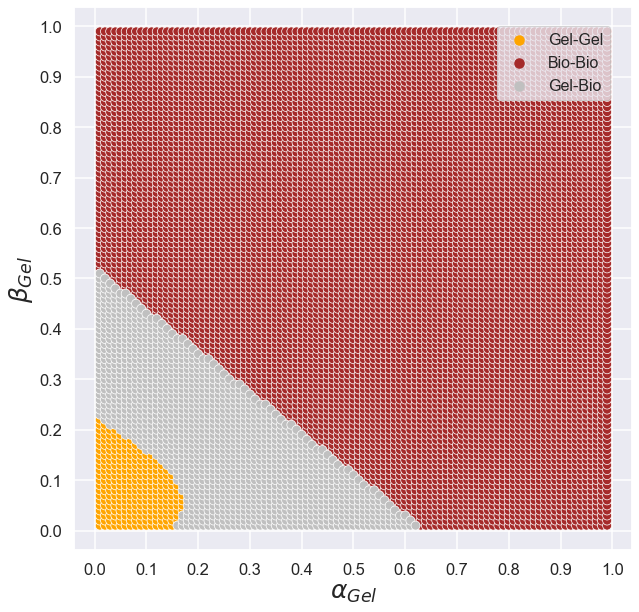

In [69]:
#scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

#scatterplot
ax=sns.scatterplot(data=dt_NBGS, x=r"$\alpha_{Gel}$", y=r"$\beta_{Gel}$", hue='Inspection Strategy',
                   palette={"No-Gel":  "blue", "No-No"  : "silver",  "Gel-No" :   "purple" , 
                            "Gel-Gel" : "orange", "No-Bio" :   "green" , "Bio-Gel" :  "black", 
                           "Bio-Bio" :  "brown", "Bio-No" :   "red","Seq-No" :  "white",
                           "Gel-Bio": "silver"}, legend=True) #Gel-Bio was brown

#plt.ylim(0, 1)
plt.xlabel(r"$\alpha_{Gel}$", size=25)  #change the size of x label
plt.ylabel(r"$\beta_{Gel}$", size=25)  #change the size of y label
sns.set(rc = {'figure.figsize':(10,10)})    #change size of figure 
plt.legend(bbox_to_anchor=(0.757, 0.964 ), loc='upper left', borderaxespad=0,fontsize=16)  #control legend  #0.757, 0.964  
                                                                                                           # 0.767, 0.964

import matplotlib.ticker as ticker
#setting the interval
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

#change the scale of plot ( chnage numbers on x and y)
sns.set_context("talk")  
#save figure
plt.savefig('E:/one-Drive/OneDrive - Auburn University/Auburn University/RA/GMS/8-First Contribution/9-Phase9- DOE/Gel-alpha&beta/z1=0.9,z2=0.1.png')